<a href="https://colab.research.google.com/github/hiren-2911/Diabetic-retina/blob/main/diabetic_retina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization,Conv2D
  
from keras.preprocessing.image import ImageDataGenerator


In [2]:
data_path='/content/drive/MyDrive/Diabetic retina/colored_images/colored_images/Mix'
train_lables=pd.read_csv('/content/drive/MyDrive/Diabetic retina/trainLabels.csv')
train_lables.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [4]:
Dictr={'0':0,'1':0,'2':0,'3':0,'4':0}
for i in train_lables['level']:
  Dictr[str(i)]=Dictr[str(i)]+1
Dictr

{'0': 25810, '1': 2443, '2': 5292, '3': 873, '4': 708}

<BarContainer object of 5 artists>

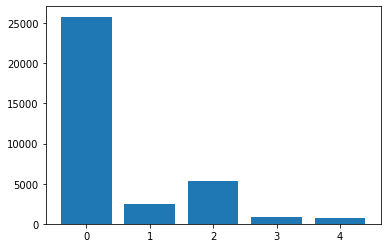

In [5]:
#Data Distribution.
#We can see the data Distribution is Highly uneven.
#We cannot get good ROC curve with such uneven distribution of data.
plt.bar(Dictr.keys(),Dictr.values())

In [6]:
#Droping data.
df=train_lables[train_lables['level']==0].index
for i in df:
  train_lables.drop(i,inplace=True)

In [7]:
updated_Dictr={'0':0,'1':0,'2':0,'3':0,'4':0}
for i in train_lables['level']:
  updated_Dictr[str(i)]=updated_Dictr[str(i)]+1
updated_Dictr

{'0': 0, '1': 2443, '2': 5292, '3': 873, '4': 708}

<BarContainer object of 5 artists>

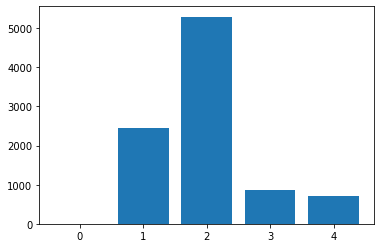

In [8]:
plt.bar(updated_Dictr.keys(),updated_Dictr.values())

In [15]:
#using pretrained model first.

model=tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3),
    pooling=None,
    classes=4,
    classifier_activation="softmax",
)

80142336/80134624 [==============================] - 1s 0us/step


In [7]:
train_datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=False)

In [12]:
train_data=train_datagen.flow_from_directory("/content/drive/MyDrive/Diabetic retina/colored_images/colored_images/",
    target_size=(224, 224),
    color_mode="rgb",
    classes=None,
    class_mode="sparse",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    subset=None,
)



Found 9126 images belonging to 4 classes.


In [9]:
def get_model(input_shape):
    model=Sequential([Conv2D(64,(3,3),kernel_initializer= tf.keras.initializers.HeUniform(),activation='relu',input_shape=input_shape,bias_initializer='ones',padding='same'),
                      MaxPooling2D(2),
                      Conv2D(64,(3,3),kernel_initializer=tf.keras.initializers.HeUniform(),activation='relu',bias_initializer='ones',padding='same'),
                      MaxPooling2D(2),
                      Conv2D(64,(3,3),kernel_initializer=tf.keras.initializers.HeUniform(),activation='relu',bias_initializer='ones',padding='same'),
                      MaxPooling2D(2),
                      Flatten(),
                      Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.HeUniform()),
                      BatchNormalization(),
                      Dropout(0.4),
                      Dense(11,activation='softmax')])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model

In [13]:
model=get_model((224,224,3))

In [15]:
history=model.fit_generator(train_data,epochs=100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
286/286 [==============================] - 106s 369ms/step - loss: 1.1126 - accuracy: 0.5580
Epoch 2/100
286/286 [==============================] - 106s 371ms/step - loss: 1.1150 - accuracy: 0.5576
Epoch 3/100
286/286 [==============================] - 105s 367ms/step - loss: 1.1134 - accuracy: 0.5581
Epoch 4/100
286/286 [==============================] - 104s 363ms/step - loss: 1.1261 - accuracy: 0.5502
Epoch 5/100
286/286 [==============================] - 104s 363ms/step - loss: 1.1222 - accuracy: 0.5537
Epoch 6/100
286/286 [==============================] - 104s 364ms/step - loss: 1.1092 - accuracy: 0.5575
Epoch 7/100
 80/286 [=======>......................] - ETA: 1:15 - loss: 1.1192 - accuracy: 0.5512

KeyboardInterrupt: ignored

In [ ]:
model = VGG16()
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
